In [1]:
import numpy as np
import gc

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_addons as tfa
#from keras.layers.core import MaxoutDense
from models.maxout_layers import Maxout1D

#dropout_enable = False

#model_file = "DL1_AntiKt4EMTopo_dropout" if dropout_enable else "DL1_AntiKt4EMTopo"
import models.rebuild_DL1 as DL1
from util import DL1_score, get_mean_score, get_mode_from_root

#model = tf.keras.models.load_model("DL1_AntiKt4EMTopo")
#model_dropout = tf.keras.models.load_model("DL1_AntiKt4EMTopo_dropout")
#test_model.summary()

#filename.root:Tdirectory/directory/obj
File_path="BTagCalibRUN2-08-40.root:DL1/AntiKt4EMTopo/net_configuration"
model, model_dropout = get_mode_from_root(File_path=File_path)

import h5py
#get test dataset
hf = h5py.File("/Users/abletimin/cernbox/b-tagg/MC16_ttbar-test-even-bjets.h5", 'r')
X_test, Y_test = hf['X_test'][:10000], hf['Y_test'][:10000]
hf.close()

#def DL1_score(pb, pc, pl): 
#    return np.log(pb/(0.08*pc + 0.92*pl))

def plot_prob_score(pb, pc, pl, DL1_score, range=(0,1)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    _n, bins, _ = ax1.hist(pb, bins=50, range=range, alpha=0.5, label="p_b")
    _ = ax1.hist(pc, bins=bins, alpha=0.5, label="p_c")
    _ = ax1.hist(pl, bins=bins, alpha=0.5, label="p_l")
    ax1.legend(loc="upper right")
    
    _ =ax2.hist(DL1_score(pb, pc, pl), 100, alpha=0.6)
    
gc.collect()

810

 ## test two models 
 
1. with drop out.
2. without dropout.

In [2]:
re_dropout = model_dropout(np.array(10000*[X_test[9]]), training=False).numpy()

#no dropout
re = model(X_test, training=False).numpy()
gc.collect()

0

score for jet 9:  4.3724794


0

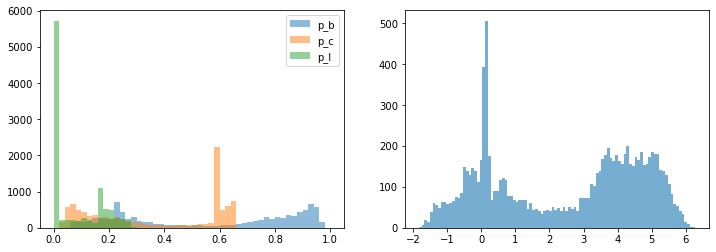

In [3]:
import matplotlib
import matplotlib.pyplot as plt

pb = re[:,2]
pc = re[:,1]
pl = re[:,0]

plot_prob_score(pb, pc, pl ,DL1_score)

print("score for jet 9: ", DL1_score(pb, pc, pl)[9])

gc.collect()

mean score:  5.095061


24890

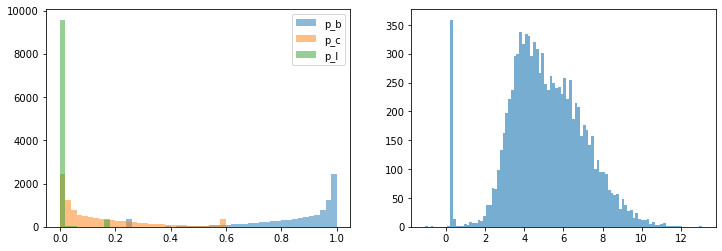

In [4]:
#with dropout enabled
pb = re_dropout[:,2]
pc = re_dropout[:,1]
pl = re_dropout[:,0]

plot_prob_score(pb, pc, pl ,DL1_score)
print("mean score: ", DL1_score(pb, pc, pl).mean())
gc.collect()

In [5]:
np.sum(DL1_score(re[:,2], re[:,1], re[:,0])>1.45)/len(re[:,0])

0.5991

## truth score VS mean score 

* Truth core is the DL1 b-tagging score calculated without dropout probablity disabled.  
* Mean score for a jet is the averarage DL1 score of 10000 evaluations with dropout probablity enabled.

### truth score

mis-tagg rage:  0.5992


24830

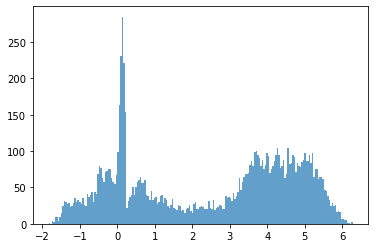

In [6]:
truth_score = DL1_score(re[:,2], re[:,1], re[:,0])
_ =plt.hist(truth_score, bins=200, alpha=0.7)
print("mis-tagg rage: ",np.sum(truth_score>1.446860433)/len(re[:,0]) )
gc.collect()

### Mean score

In [7]:
%%time
N_foward = 10000
mean_score=get_mean_score(X_test[:,:], model_dropout, N_foward=N_foward)
gc.collect()

/Users/abletimin/work/ATLAS/b-tagg/DL1_model/util/tools.py:19: RuntimeWarning: overflow encountered in log
  return np.log(pb/(0.08*pc + 0.92*pl))


CPU times: user 43min 20s, sys: 36min 49s, total: 1h 20min 10s
Wall time: 43min 24s


0

mis-tagg rage:  0.6275


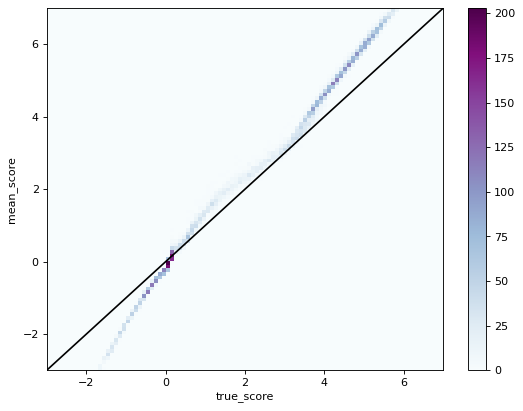

In [11]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
def plot_2d(x,y,bins, x_label="", y_label=""):
    _h,_xedg, _yedg, _ =plt.hist2d(x,y ,bins=np.linspace(-3,7,bins),  cmap=plt.cm.BuPu)
    plt.colorbar()
    plt.xlim(-3,7)
    plt.ylim(-3,7)
    plt.plot(_xedg, _xedg, '-', color='k')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

plot_2d(x=truth_score, y=mean_score[:,0],bins=100, x_label="true_score", y_label="mean_score")
print("mis-tagg rage: ",np.sum(mean_score[:,0]>1.45)/len(mean_score[:,0]) )

4685

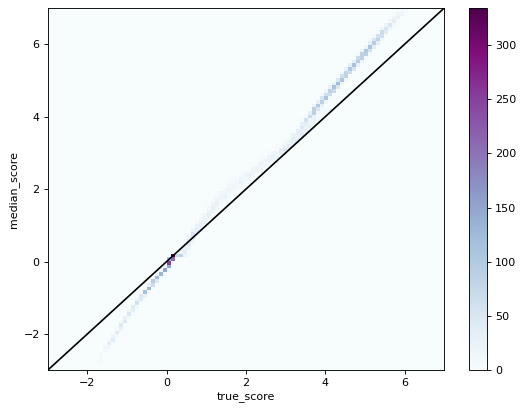

In [13]:
median_score=get_mean_score(X_test[:,:], model_dropout, N_foward=N_foward, median=True)
figure(figsize=(8, 6), dpi=80)
plot_2d(x=truth_score, y=median_score[:,0],bins=100, x_label="true_score", y_label="median_score")
gc.collect()

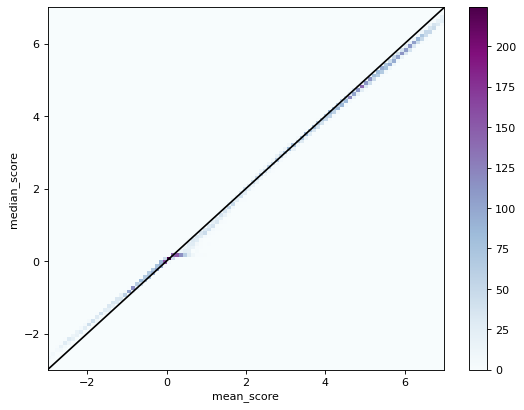

In [14]:
figure(figsize=(8, 6), dpi=80)
plot_2d(x=mean_score[:,0], y=median_score[:,0],bins=100, x_label="mean_score", y_label="median_score")